# This is a test Notebook for 
1. Classifier without PCA 
2. with Neutral class Inclusion
3. With angles inclusion
4. No LSTM

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff

In [23]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import numpy as np

In [24]:
features_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GDP3/initial_implementation/Action_recognition/data_proc/features_X_434N.csv")
features_labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GDP3/initial_implementation/Action_recognition/data_proc/features_Y_434N.csv")

In [25]:

features_data.columns = ["default_"]
features_data_ = features_data["default_"].str.split(" ", expand=True)

features_data_.to_csv("features_434X.csv")

In [26]:
features_labels.columns = ["labels"]
features_labels.to_csv("features_434Y.csv")


In [27]:
data_x = pd.read_csv("/content/features_434X.csv")
data_y = pd.read_csv("/content/features_434Y.csv")

In [28]:
data_x = data_x.drop('Unnamed: 0', axis=1)

In [29]:
data_x.head(2)

,0,1,2,3,4,5,6,7,8,9,...,424,425,426,427,428,429,430,431,432,433
0,0.0,0.0,0.00000,0.34541,0.1658,0.04145,-0.08290,0.78754,0.00000,0.15198,...,0.51155,0.38614,0.49572,0.36446,0.88472,0.51800,0.67006,0.90476,0.72893,0.62066
1,0.0,0.0,0.20649,0.37168,0.0413,0.12389,0.31661,0.78465,-0.17895,0.17896,...,0.53064,0.39980,0.48838,0.40698,0.95142,0.46403,0.69067,0.92494,0.71193,0.65244


In [30]:
data_y.head(2)

,Unnamed: 0,labels
0,0,1
1,1,1


In [31]:
y = data_y.labels
X = data_x
features_labels = X.columns
RF = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
RF.fit(X,y)
features_imp = RF.feature_importances_

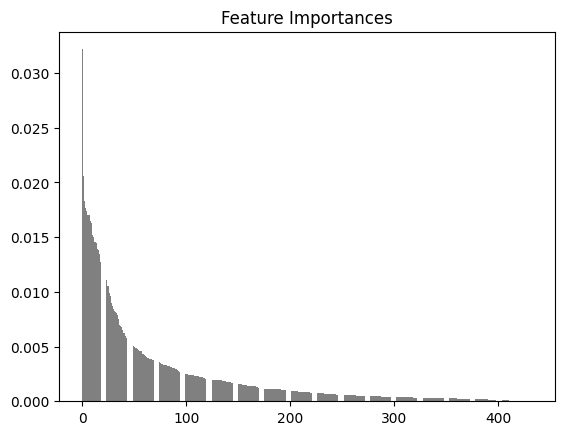

In [32]:
indices = np.argsort(features_imp)[::-1]
    
# Visualization
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), features_imp[indices], color = "grey", align = "center")
#plt.xticks(range(X.shape[1]), features_labels, rotation = 90)
plt.show()

#for i in range(X.shape[1]):
#    print ("%2d) %-*s %f" % (i + 1, 30, features_labels[i], features_imp[indices[i]]))
    

# Creating a baseline model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth=60)
models = []
models.append(("Neural Net", MLPClassifier(hidden_layer_sizes=(20, 30, 40))))
#models.append(("SVC", SVC(kernel="linear", C=10.0)))
models.append(("KNN", KNeighborsClassifier(n_neighbors=5, metric = "minkowski", weights= "uniform", p=2, leaf_size = 30, algorithm= "auto", metric_params =None)))
models.append(("Logistic Regression", LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, C = 1.0, fit_intercept = True,
                            intercept_scaling = 1, class_weight = None, 
                            random_state = None, solver = 'liblinear', max_iter = 100,
                            multi_class = 'ovr', verbose = 2)))
models.append(("Adaboost", AdaBoostClassifier(estimator=base_estimator, n_estimators = 200, learning_rate = 1.0)))
models.append(("GradientBoost", GradientBoostingClassifier(loss = 'log_loss', n_estimators = 200)))
models.append(("RandomForest", RandomForestClassifier(n_estimators=10, criterion='gini')))


#TODO: Adaboost, voting, GNB



In [36]:
y_bin = label_binarize(y_train, classes=[0, 1, 2,3])
y_bin_test = label_binarize(y_test, classes=[0, 1, 2,3])

In [37]:
from sklearn.metrics import roc_auc_score

names = []
acc_results = []
test_labels = []
roc_auc_results = []
models_fit = []

for name, model in models:
    print(name)
    names.append(name)
    
    model_ = model.fit(X_train, y_train)
    models_fit.append(model_)
    
    acc = model_.score(X_test, y_test)
    acc_results.append(acc)
    print(f"Accuracy: {acc:.3f}")
    
    test_ = model_.predict_proba(X_test)
    test_ = test_[:, 1]
    test_labels.append(test_)
    

    #roc_auc_scores = roc_auc_score(y_test, test_, multi_class='ovr')
    #roc_auc = roc_auc_score(y_test, test_, multi_class='ovo', average='weighted')
    #roc_auc_results.append(roc_auc)
    #print(f"ROC AUC: {roc_auc:.3f}")


Neural Net
Accuracy: 0.979
KNN
Accuracy: 0.994
Logistic Regression
[LibLinear]Accuracy: 0.924
Adaboost
Accuracy: 0.921
GradientBoost
Accuracy: 0.976
RandomForest
Accuracy: 0.985


In [38]:
# Import the cross-validation module
from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def CrossValidationDict(models_list, scr, X_train = X_test, y_train = y_test, cv = 10):
    cvDict = {}
    for mo in models_list:
        cvScore = cross_val_score(mo, X_train, y_train, cv = cv, scoring = 'accuracy')
        
        cvDict[str(mo).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [39]:
CrossValidationDict(models_fit, scr = 'accuracy')
# second value indicates variation in the outpur

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

{'MLPClassifier': [0.9574810606060605, 0.027733281194076476],
 'KNeighborsClassifier': [0.9268939393939395, 0.04371842294788898],
 'LogisticRegression': [0.8601325757575757, 0.05466902892182447],
 'AdaBoostClassifier': [0.8814393939393941, 0.028650489541440425],
 'GradientBoostingClassifier': [0.9330492424242426, 0.040381457250159576],
 'RandomForestClassifier': [0.9267992424242426, 0.04619047943938471]}

# Standard Scaling the Features

In [40]:
X_train_ = np.array(X_train)
scaler = StandardScaler()

# For the test set
X_test_ = np.array(X_test)

X_train_transform = scaler.fit_transform(X_train_)
X_test_transform = scaler.fit_transform(X_test_)

In [41]:
from sklearn.metrics import roc_auc_score

names = []
acc_results = []
test_labels = []
test_pred_labels = []
roc_auc_results = []
models_fit = []

for name, model in models:
    print(name)
    names.append(name)
    
    model_ = model.fit(X_train_transform, y_train)
    models_fit.append(model_)
    
    acc = model_.score(X_test_transform, y_test)
    acc_results.append(acc)
    print(f"Accuracy: {acc:.3f}")
    
    test_ = model_.predict_proba(X_test_transform)
    test_pred = model_.predict(X_test_transform)
    test_pred_labels.append(test_pred)
    #print(test_pred)
    test_ = test_[:, 1]
    test_labels.append(test_)
    

Neural Net
Accuracy: 0.979
KNN
Accuracy: 0.982
Logistic Regression
[LibLinear]Accuracy: 0.948
Adaboost
Accuracy: 0.933
GradientBoost
Accuracy: 0.976
RandomForest
Accuracy: 0.985


In [42]:
# Import the cross-validation module
from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def CrossValidationDict(models_list, scr, X_train = X_test_transform, y_train = y_test, cv = 10):
    cvDict = {}
    for mo in models_list:
        cvScore = cross_val_score(mo, X_train, y_train, cv = cv, scoring = 'accuracy')
        
        cvDict[str(mo).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [43]:
CrossValidationDict(models_fit, scr = 'accuracy')

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

{'MLPClassifier': [0.9330492424242426, 0.04469867501240964],
 'KNeighborsClassifier': [0.8876893939393942, 0.04053251551593592],
 'LogisticRegression': [0.9056818181818184, 0.037285120506750945],
 'AdaBoostClassifier': [0.878409090909091, 0.03834747912429507],
 'GradientBoostingClassifier': [0.9360795454545455, 0.04185402521446287],
 'RandomForestClassifier': [0.9331439393939395, 0.03782240121299795]}

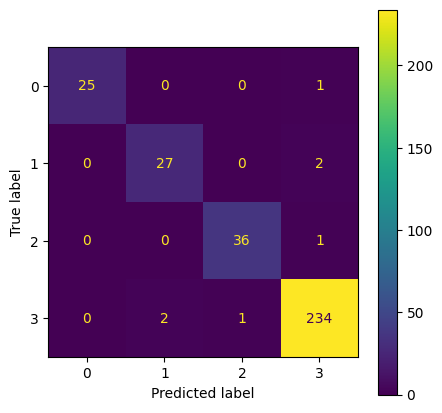

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import metrics
classes=[0,1,2,3]
plt.rcParams["figure.figsize"] = (5,5)
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_labels[0])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classes)
cm_display.plot()
plt.show()

In [ ]:
#0: Kicking
#1: Punching
#2: Pushing

# Test code for MULTICLASS roc_auc_curve

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC




# Train a classifier using the One-vs-All strategy
clf = MLPClassifier(hidden_layer_sizes=(10, 30))
clf.fit(X_train, y_bin)

# Compute the predicted probabilities for each class
y_score = clf.predict_proba(X_test)
#print(y_score)
acc = model_.score(X_test, y_test)
#print(acc)


roc_auc_scores = roc_auc_score(y_bin_test, y_score, multi_class='ovr')
print(roc_auc_scores)
# Compute the ROC curve and ROC AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin_test[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_bin_test[:, i], y_score[:, i])

# Compute the micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin_test.ravel(), y_score.ravel())
roc_auc["micro"] = roc_auc_score(y_bin_test, y_score, multi_class='ovo', average='weighted')


1.0


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
# Plot ROC curve for each class
plt.figure()
lw = 2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'
                                               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()